# Liberías

In [1]:

import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report,recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import tree,svm,neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.constraints import max_norm

In [21]:
import tensorflow as tf
# from tf.compat.v1.keras.backend.set_session import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

Device mapping: no known devices.


# Lectura de datos

In [2]:
data = pd.read_csv('../../splited_RASFF_DATA_16092019.csv', sep=';', 
                header=0, index_col = 0)
data ['DATE_CASE'] = data ['DATE_CASE'].astype(str)
data ['HAZARDS_CAT'] = data ['HAZARDS_CAT'].astype(str)
data = data.sample(frac = 1)
train  = data
train

,DATE_CASE,NOT_COUNTRY,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,HAZARDS_CAT,COUNT_ORIGEN,COUNT_DESTIN,COUNT_CONCERN
67375,2014-03-06,Ireland,bivalve molluscs and products thereof,food,serious,informing recipient(s),product (presumably) no longer on the market,microbial contaminants (other),Ireland,Hong Kong,
116738,2008-04-23,France,fats and oils,food,undecided,official detention,distribution on the market (possible),environmental pollutants,Ukraine,Italy,Slovenia
118595,2007-12-21,Czech Republic,cereals and bakery products,food,undecided,withdrawal from the market,distribution on the market (possible),organoleptic aspects,Netherlands,Romania,Germany
100760,2010-06-16,Finland,cereals and bakery products,food,undecided,withdrawal from the market,distribution on the market (possible),novel food,United Kingdom,Finland,
141245,2004-01-28,Germany,"soups, broths, sauces and condiments",food,undecided,(obsolete),,composition,France,Switzerland,
...,...,...,...,...,...,...,...,...,...,...,...
47129,2016-03-24,Germany,alcoholic beverages,food,undecided,public warning - press release,distribution to other member countries,foreign bodies,Italy,Singapore,Spain
66764,2014-04-01,France,pet food,feed,not serious,no action taken,information on distribution not (yet) available,composition,France,France,
137691,2004-11-09,Germany,honey and royal jelly,food,undecided,return to consignor,no distribution,residues of veterinary medicinal products,Vietnam,Austria,Slovenia
86356,2012-03-08,Poland,fruits and vegetables,food,undecided,re-dispatch,no distribution,organoleptic aspects,Chile,,Commission Services


# Features

In [3]:
features = [0,1,6,8]
target = [2]
X = train.iloc[:,features]
y = train.iloc[:,target]

In [4]:
X 

,DATE_CASE,NOT_COUNTRY,DISTRIBUTION_STAT,COUNT_ORIGEN
67375,2014-03-06,Ireland,product (presumably) no longer on the market,Ireland
116738,2008-04-23,France,distribution on the market (possible),Ukraine
118595,2007-12-21,Czech Republic,distribution on the market (possible),Netherlands
100760,2010-06-16,Finland,distribution on the market (possible),United Kingdom
141245,2004-01-28,Germany,,France
...,...,...,...,...
47129,2016-03-24,Germany,distribution to other member countries,Italy
66764,2014-04-01,France,information on distribution not (yet) available,France
137691,2004-11-09,Germany,no distribution,Vietnam
86356,2012-03-08,Poland,no distribution,Chile


In [5]:
y

,PROD_CAT
67375,bivalve molluscs and products thereof
116738,fats and oils
118595,cereals and bakery products
100760,cereals and bakery products
141245,"soups, broths, sauces and condiments"
...,...
47129,alcoholic beverages
66764,pet food
137691,honey and royal jelly
86356,fruits and vegetables


# Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Para probar codificaciones (opcional)

In [7]:
encX = OneHotEncoder(handle_unknown='ignore')
#encX = OrdinalEncoder()
#encX = FeatureHasher(n_features=25,input_type='string')
#encX = MultiLabelBinarizer()
encX.fit(X.values)
X_one_hot = encX.transform(X.values)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2)

# Árboles de decisión

In [10]:
params ={'criterion' :['gini', 'entropy'], 
         'splitter' :['best', 'random'], 
         'max_features':['auto', 'sqrt', 'log2']
        }
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
clf = grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [11]:
clf.best_estimator_

DecisionTreeClassifier(max_features='auto', random_state=42)

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=42)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred, zero_division=0))

                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.88      0.88      0.88       100
                  animal by-products - (obsolete)       1.00      0.50      0.67         6
                    animal nutrition - (obsolete)       0.75      0.78      0.77       122
            bivalve molluscs and products thereof       0.76      0.80      0.78       465
                 cephalopods and products thereof       0.65      0.70      0.67       164
                      cereals and bakery products       0.84      0.81      0.83      1405
     cocoa and cocoa preparations, coffee and tea       0.88      0.88      0.88       644
                                   compound feeds       0.89      0.81      0.85       191
                                    confectionery       0.84      0.83      0.84       535
                 crustaceans and products thereof       0.73      0.69      0.71       53

specificity:  0.8529640358934502
sensitivity:  0.8208801686833506
precision:  0.8435888691180553


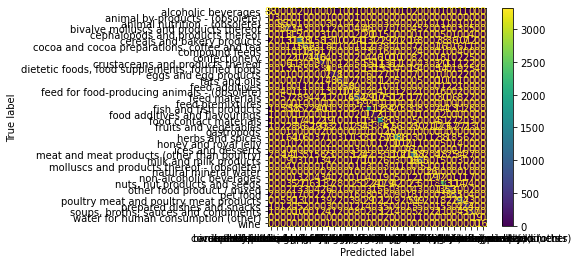

In [14]:
print("specificity: ",clf.score(X_test, y_test))

print("sensitivity: ",recall_score(y_test, y_pred, average='macro'))

print("precision: ",precision_score(y_test, y_pred, average='macro'))

cm= confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_) 
disp.plot() 

# Random Forest

In [17]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 34.7min finished
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [18]:
clf = RandomForestClassifier(bootstrap = True, max_depth = 110, max_features = 3, min_samples_leaf =  3, min_samples_split = 12, n_estimators =  100)
clf = clf.fit(X_train,y_train)

<ipython-input-18-b382fc73506a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train,y_train)


In [19]:
y_pred = clf.predict(X_test)

In [20]:
y_pred

array(['fruits and vegetables', 'fruits and vegetables',
       'fruits and vegetables', ..., 'food contact materials',
       'dietetic foods, food supplements, fortified foods',
       'fish and fish products'], dtype=object)

In [21]:
print(classification_report(y_test,y_pred))

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.00      0.00      0.00        85
                  animal by-products - (obsolete)       0.00      0.00      0.00         8
                    animal nutrition - (obsolete)       0.00      0.00      0.00       112
            bivalve molluscs and products thereof       0.00      0.00      0.00       494
                 cephalopods and products thereof       0.00      0.00      0.00       155
                      cereals and bakery products       0.98      0.04      0.07      1355
     cocoa and cocoa preparations, coffee and tea       0.00      0.00      0.00       664
                                   compound feeds       0.00      0.00      0.00       199
                                    confectionery       0.00      0.00      0.00       555
                 crustaceans and products thereof       0.00      0.00      0.00       58

specificity:  0.320214795449728
sensitivity:  0.0886573172582012


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision:  0.09573670641958673
accuracy: 0.320214795449728


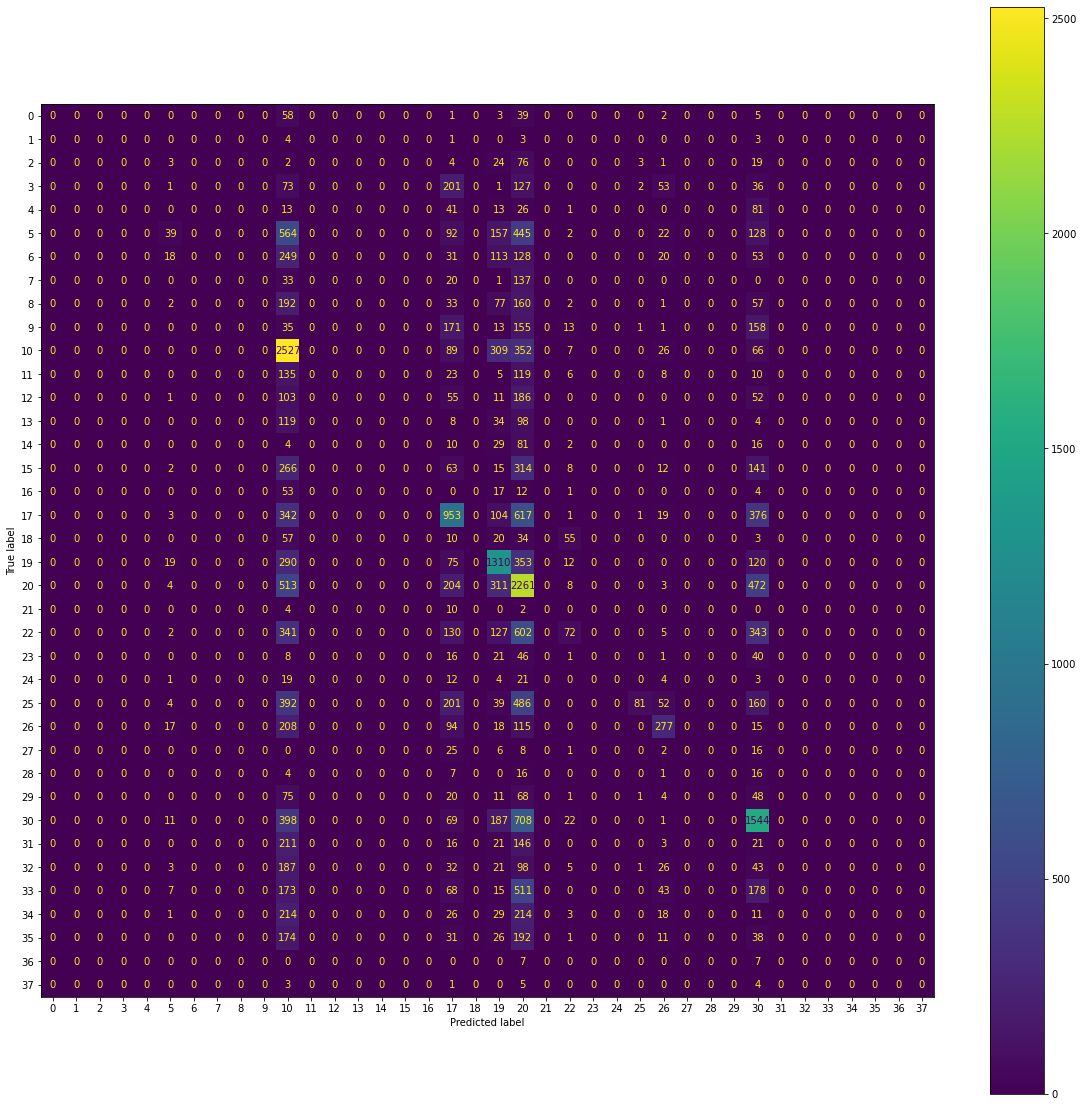

In [18]:
print("specificity: ",clf.score(X_test, y_test))

print("sensitivity: ",recall_score(y_test, y_pred, average='macro'))

print("precision: ",precision_score(y_test, y_pred, average='macro'))

print("accuracy:",accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(20, 20))
cm.plot(ax=ax)


# Gaussian naive Bayes clasiffier

In [ ]:
params = {'var_smoothing': np.logspace(0,-9, num=1)}
gs_NB =  GridSearchCV(GaussianNB(), params, verbose=1, cv=3)
gs_NB.fit(X_train.toarray(), y_train)

gs_NB.best_params_

In [ ]:
clf = GaussianNB(var_smoothing = 1.0)
clf = clf.fit(X_train_one_hot.toarray(),y_train)

In [ ]:
y_pred = clf.predict(X_test_one_hot.toarray())

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
clf.score(X_test_one_hot.toarray(), y_test)

# Regresión logística

In [ ]:
clf = LogisticRegression(average='micro')

grid_values = {'penalty': ['l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train,y_train)

In [ ]:
grid_clf_acc.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [13]:
clf = LogisticRegression(penalty= 'l2',C=0.001)
clf = clf.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [14]:
y_pred = clf.predict(X_test)

In [15]:
print(classification_report(y_test,y_pred))

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.00      0.00      0.00       108
                  animal by-products - (obsolete)       0.00      0.00      0.00        11
                    animal nutrition - (obsolete)       0.00      0.00      0.00       132
            bivalve molluscs and products thereof       0.00      0.00      0.00       494
                 cephalopods and products thereof       0.00      0.00      0.00       175
                      cereals and bakery products       0.28      0.03      0.05      1449
     cocoa and cocoa preparations, coffee and tea       0.00      0.00      0.00       612
                                   compound feeds       0.00      0.00      0.00       191
                                    confectionery       0.00      0.00      0.00       524
                 crustaceans and products thereof       0.00      0.00      0.00       54

specificity:  0.320214795449728
sensitivity:  0.0886573172582012
precision:  0.09573670641958673
accuracy: 0.320214795449728


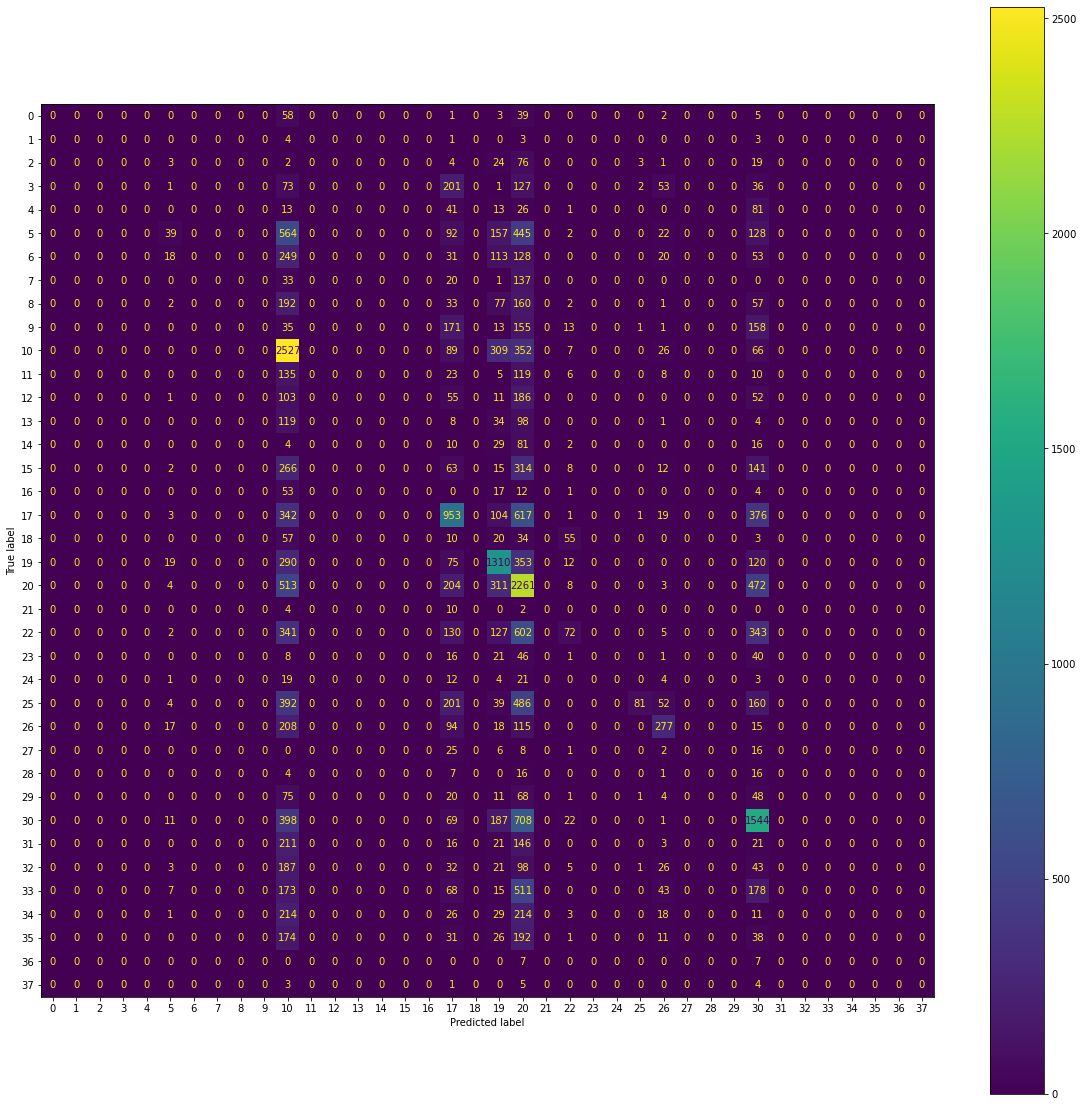

In [19]:
print("specificity: ",clf.score(X_test, y_test))

print("sensitivity: ",recall_score(y_test, y_pred, average='macro'))

print("precision: ",precision_score(y_test, y_pred, average='macro'))

print("accuracy:",accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(20, 20))
cm.plot(ax=ax)

# Support vector machine

In [9]:
clf = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
clf = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.553, total=12.0min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.0min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.551, total=12.0min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 24.0min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.554, total=12.0min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.553, total=12.0min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.550, total=12.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.484, total= 7.3min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.484, total= 7.3min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.490, total= 7.3min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.489, total= 7.3min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

In [ ]:
clf.best_params_

In [ ]:
clf.score(X_test, y_test)

# Boosted Trees

In [11]:
param_grid = {'n_estimators':range(20,81,10),
 'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],
  'max_depth':range(5,16,2),
  'min_samples_split':range(200,1001,200)}

In [16]:
clf = GridSearchCV(estimator = GradientBoostingClassifier(max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_grid,n_jobs=4, cv=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
clf.score(X_test, y_test)

In [ ]:
clf = AdaBoostClassifier()
clf = clf.fit(X_train_one_hot,y_train)
y_pred = clf.predict(X_test_one_hot)
print(classification_report(y_test,y_pred))

In [ ]:
clf.score(X_test_one_hot, y_test)

# Nearest centroid

In [ ]:
clf = NearestCentroid()
clf = clf.fit(X_train_one_hot,y_train)
y_pred = clf.predict(X_test_one_hot)
print(classification_report(y_test,y_pred))

In [ ]:
clf.score(X_test_one_hot, y_test)

# Nearest neighbor

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf = clf.fit(X_train_one_hot,y_train)
y_pred = clf.predict(X_test_one_hot)
print(classification_report(y_test,y_pred))

In [ ]:
clf.score(X_test_one_hot, y_test)

# MLP sin embeddings

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y_train.values)
Y_train_label = le.transform(y_train.values) 
y_train_one_hot = to_categorical(Y_train_label)
display(y_train_one_hot)

In [ ]:
y_test_label = le.transform(y_test.values) 
y_test_one_hot = to_categorical(y_test_label)
display(y_test_one_hot)

In [ ]:
model = Sequential() 
model.add(Dense(300, activation='relu', input_dim=351))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(38)) 
optimizer = RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics= ['accuracy'])

In [ ]:
hist = model.fit(X_train_one_hot,y_train_one_hot, epochs=70,validation_data=(X_test_one_hot, y_test_one_hot), batch_size=120)

In [ ]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.show()


plt.plot(hist.history['acc']) 
plt.plot(hist.history['val_acc']) 
plt.show()

## Pruebas grid search

In [ ]:
def create_model(neuronas1 = 25,neuronas2 =25,neuronas3 = 25):
           
    model = Sequential()
    activation='relu'
    init_mode='normal'
    dropout_rate=0.0
    weight_constraint=0
    model.add(Dense(neuronas1, activation=activation, input_dim=374,kernel_initializer=init_mode))
    model.add(Dense(neuronas2, activation=activation,kernel_initializer=init_mode))
    model.add(Dense(neuronas3, activation=activation,kernel_initializer=init_mode))
    model.add(Dropout(dropout_rate))
    model.add(Dense(38,kernel_initializer=init_mode))
    optimizer = RMSprop(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    return model

seed = 7
np.random.seed(seed)
model = KerasClassifier(build_fn=create_model, verbose=1,batch_size=120, epochs = 70)

In [ ]:
neuronas1 = [25,75,100,150,200,250,300,350,400]
neuronas2 = [25,75,100,150,200,250,300,350,400]
neuronas3 = [25,75,100,150,200,250,300,350,400]
param_grid = dict(neuronas1=neuronas1,neuronas2=neuronas2,neuronas3=neuronas3)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_one_hot, y_train_one_hot)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))